In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [8]:
# generate data
def generate_data(n, beta_0, beta_1):
    x = np.arange(n)
    e = np.random.uniform(-10, 10, size = (n,))
    y = beta_0 + beta_1 * x + e
    
    return x, y

x, y = generate_data(100, 2, .4)

In [11]:
# turning generated data points into pandas dataframe
zipped = list(zip(x, y))
df = pd.DataFrame(zipped, columns=['X', 'Y'])
df

,X,Y
0,0,-5.164294
1,1,7.187078
2,2,2.598918
3,3,-5.856688
4,4,-4.895588
...,...,...
95,95,49.707789
96,96,49.637589
97,97,41.902052
98,98,36.435145


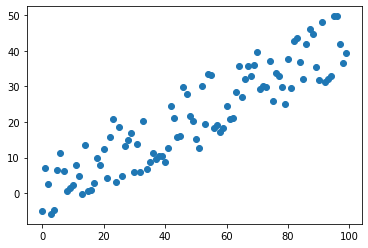

In [13]:
plt.scatter(x, y)

In [18]:
def cal_mean(readings):
    """
    Function to calculate the mean value of the input readings
    :param readings:
    :return:
    """
    #calculating sum of readings and storing in the readings_total
    readings_total = sum(readings) 
    #find the number of readings by using len function
    number_of_readings = len(readings)
    #calculating mean
    mean = readings_total / float(number_of_readings)
    return mean

In [21]:
def cal_variance(readings):
    """Calculating the variance of the readings
    :param readings:
    :return:
    """
    
    #to calculate the variance, we need the mean value
    readings_mean = cal_mean(readings)
    # mean difference squared readings
    mean_difference_squared_readings = [pow((reading - readings_mean), 2) for reading in readings]
    variance = sum(mean_difference_squared_readings)
    
    return variance / float(len(readings) - 1)

In [20]:
def cal_covariance(readings_1, readings_2):
    """Calculate the covariance between two different list of readings
    :param readings_1:
    :param readings_2:
    :return:
    """
    
    #to calculate covariance, we need to calculate the mean of the series
    readings_1_mean = cal_mean(readings_1)
    readings_2_mean = cal_mean(readings_2)
    
    readings_size = len(readings_1)
    covariance = 0.0
    
    for i in range(0, readings_size):
        covariance += (readings_1[i] - readings_1_mean) * (readings_2[i] - readings_2_mean)
    
    return covariance / float(readings_size - 1)

In [22]:
def cal_coefficients(x_readings, y_readings):
    """Calculating the simple linear regression coefficients B0, B1
    :param x_readings:
    :param y_readings:
    :return:
    """
    #Coefficient W1 = covariance of x_readings and y_readings divided by variance of x_readings
    w1 = cal_covariance(x_readings, y_readings) / float(cal_variance(x_readings))
    
    # Coefficient W0 = mean of y_readings - (W1 * the mean of the x_readings)
    w0 = cal_mean(y_readings) - (w1 * cal_mean(x_readings))
    
    return w0, w1

In [23]:
def get_headers(dataframe):
    """Get the headers name of the dataframe
    """
    return dataframe.columns.values

In [32]:
def cal_rmse(actual_readings, predicted_readings):
    """Calculating the root mean square error
    :param actual_readings:
    :param predicted_readings:
    :return:
    """
    
    square_error_total = 0.0
    total_readings = len(actual_readings)
    
    for i in range(0, total_readings):
        error = predicted_readings[i] - actual_readings[i]
        square_error_total += pow(error, 2)
    rmse = square_error_total / float(total_readings)
    
    return rmse

In [43]:
def simple_linear_regression(dataset):
    """Implementing the simple linear regression without using any python
    library
    :param dataset:
    :return:
    """
    
    #Get the dataset header names
    dataset_headers = get_headers(dataset)
    print("Dataset Headers ::", dataset_headers)
    
    #Calculate the mean of x and y readings
    x_mean = cal_mean(dataset[dataset_headers[0]])
    y_mean = cal_mean(dataset[dataset_headers[1]])
    
    #Calculate variance
    x_variance = cal_variance(dataset[dataset_headers[0]])
    y_variance = cal_variance(dataset[dataset_headers[1]])
    
    #Calculating the regression
    covariance_of_X_and_Y = dataset.cov()[dataset_headers[0]][dataset_headers[1]]
    w1 = covariance_of_X_and_Y / float(x_variance)
    
    w0 = y_mean - (w1 * x_mean)
    
    #Predictions
    dataset['Predicted'] = w0 + w1 * dataset[dataset_headers[0]]
    
    #RMSE
    rmse = cal_rmse(dataset[dataset_headers[1]],dataset[dataset_headers[2]])
    print("RMSE ::",rmse)
    
    
    return dataset

In [44]:
simple_linear_regression(df)


Dataset Headers :: ['X' 'Y' 'Predicted']
RMSE :: 34.651102709993204


,X,Y,Predicted
0,0,-5.164294,-0.814739
1,1,7.187078,-0.373162
2,2,2.598918,0.068416
3,3,-5.856688,0.509994
4,4,-4.895588,0.951571
...,...,...,...
95,95,49.707789,41.135143
96,96,49.637589,41.576721
97,97,41.902052,42.018299
98,98,36.435145,42.459876


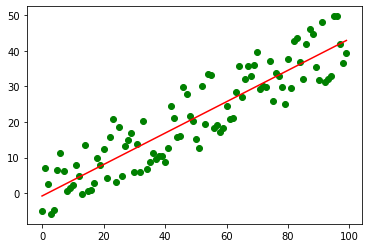

In [45]:
plt.plot(df['X'], df['Predicted'] , color='red', label='regression line')     # regression line
plt.scatter(df['X'], df['Y'], c='green', label='actual values')   # scatter plot showing actual data